# AM207 Homework 2

### Chris En and Ethan Zou

##### Data: wine_quality_missing.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 22nd, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [1]:
import numpy as np
import scipy.stats
import scipy.special
import math

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline

## Question 1: Give Me the Full Monte, Carlo Ancelotti

**Coding required**

In the quiet moments that transpire just before the sun rises that find us taking the walk of shame we can only send up quiet prayers to deities unknown that our path has not unknowingly taken us down the Boulevard of Broken Dreams (*Green Day*).  Along this road you'll find scattered the shattered hearts of formerly aspiring humorists -- the sorts of folk who might admire "the giggle at a funeral" (*Hozier*) distributed according to the function $\heartsuit(\theta) \sim \frac{ {\rm sin^{24}}\theta}{\theta^2}$ from $0< \theta< \infty$ and otherwise.  As a current aspiring humorist, it is your job to try to integrate $\heartsuit(\theta)$ in order to size up the jar you'll take with you as you go heart collecting (*Christina Perri*).  Who do you think you are anyway?

1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.

1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over the bounded domain [0, M] and get an accurate result.  What value of M should you choose to get a result within 0.001 of the exact solution?

1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?

1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?

1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times. Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.  

1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?

1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $

1.8. Based on your answer in 1.7 was your choice of M justified? 

### Answers

<div class="answer-separator">
------------------------
</div>

<h4>1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.</h4>

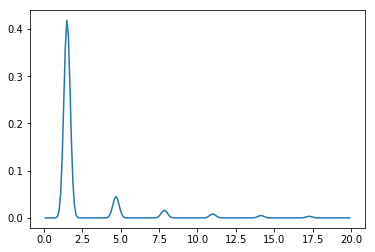

In [64]:
def heart(t):
    return math.sin(t)**24/(t**2)

vheart = np.vectorize(heart)

x = np.arange(0.1,20,0.1)
y = vheart(x)

plt.plot(x,y,'-')

<div class="answer-separator">
------------------------
</div>

<h4>1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over a bounded domain and get an accurate result.  What bounds should you choose to get a result within 0.001 of the exact solution?</h4>

<div class="answer">

<br>
Note that for any $\theta>0$, $\heartsuit(\theta)\le 1/\theta^2$. We also know that because $\int_a^\infty \frac{1}{x^2}dx = \frac{1}{a}$, for any $\epsilon>0$, we can find some $M$ such that $\int_M^\infty\heartsuit(\theta)d\theta \le \int_M^\infty \frac{1}{x^2}dx = 1/M < \epsilon$. Thus, we can integrate $\heartsuit$ over a bounded domain for arbitrary accuracy. A lower bound of $M=500$, for example, may get us within 0.001 of the exact solution.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?</h4>

In [103]:
def simulate_heart_collection(M,N):
    x = np.random.uniform(0,M,N)
    y = vheart(x)
    return M/N * np.sum(y)

simulate_heart_collection(300, 100000)

0.26616778827828924

<div class="answer-separator">
------------------------
</div>

<h4>1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?</h4>

<div class="answer">

<br>
The exact value of the integral is $\frac{\pi}{2^{23}}\binom{22}{11} \approx 0.2642$. Our estimate was reasonably accurate (though just outisde the desired accuracy bound), but the variance is still high. A greater number of samples would be required to reduce variance and increase precision.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times.  Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.</h4>

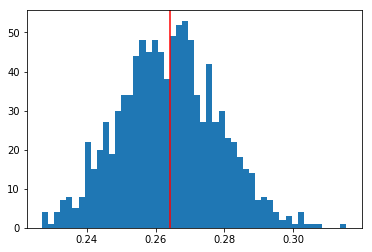

In [106]:
x = [simulate_heart_collection(300, 100000) for _ in range(1000)]
fig = plt.figure()
plt.hist(x, bins=50)
plt.axvline(0.2642, color='red')


<div class="answer-separator">
------------------------
</div>

<h4>1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $
</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.8. Based on your answer in 1.7 was your choice of M justified?
</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Rally to Me! 

**Some Coding required**

Suppose you observe the following data set $\mathbf{x}^{(0)} = (0.5, 2.5), \mathbf{x}^{(1)} = (3.2, 1.3), \mathbf{x}^{(2)} = (2.72, 5.84), \mathbf{x}^{(3)}= (10.047, 0.354)$. By convention, for any vector $\mathbf{x}$, we will denote the first component of $\mathbf{x}$ by $x_{1}$ and the second component by $x_{2}$. Suppose that the data is drawn from the same two-dimensional probability distribution with pdf $f_X$, that is, $\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$, where
$$
f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}.
$$
You should assume that $\lambda_1, \lambda_0 > 0$ and that $f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ (i.e. $f_X$ is zero when either component is negative). 

2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?  **Support your answer with full and rigorous analytic derivations.**

2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?</h4>

<div class="answer">

<br>
First, we know that the PDF of $f_X$ should integrate to 1 over its support. So, we can write

$$\int_0^\infty\int_0^\infty 4\lambda_1^2xye^{-\lambda_0(x^2+y^2)}dxdy = 1$$

$$\implies\int_0^\infty 2\frac{\lambda_1^2}{\lambda_0}ye^{-\lambda_0y^2}dy = 1$$

$$\implies\frac{\lambda_1^2}{\lambda_0^2} = 1\implies \lambda_0 = \lambda_1$$

So, let us denote $\lambda = \lambda_0 = \lambda_1$. Then, we want to maximize the log likelihood of the data, given by

$$\sum_i\ln f_X(x^{(i)}) = \sum_i\ln\left[4\lambda^2x^{(i)}_1x^{(i)}_2e^{-\lambda\left(x^{(i)2}_1 + x^{(i)2}_2\right)}\right]$$

$$ = \sum_i\left[\ln4 + 2\ln\lambda + \lambda x^{(i)}_1 + \lambda x^{(i)}_2 - \lambda\left(x^{(i)2}_1 + x^{(i)2}_2\right)\right]$$

Setting the derivative with respect to $\lambda$ to 0, we get

$$\frac{\partial \sum_i\ln f_X(x^{(i)})}{\partial\lambda} = \sum_i\left[\frac{2}{\lambda} - x^{(i)2}_1 - x^{(i)2}_2\right] = 0$$

$$\implies \lambda = \lambda_0 = \lambda_1 = \frac{2n}{\sum_i\left(x^{(i)2}_1 + x^{(i)2}_2\right)}$$

where $n$ is the number of data points. So, for the given data, we have $\lambda_0 = \lambda_1 \approx 0.050$
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).</h4>

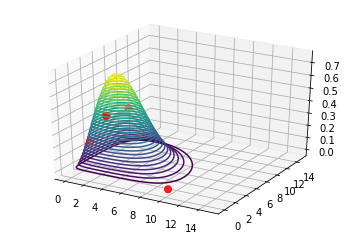

In [9]:
xv = np.array([[0.5,2.5],[3.2,1.3],[2.72,5.84],[10.047,0.354]])
lb = 2 * len(xv) / (np.sum(np.square(xv)))

def f_X(x):
    return 4 * lb * x[0] * x[1] *np.exp(-lb * np.sum(np.square(x)))

X = np.arange(0,15,0.1)
Y = np.arange(0,15,0.1)
XY = np.meshgrid(X,Y)
Z = np.apply_along_axis(f_X, 0, XY)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 30, cmap='viridis')
ax.scatter(xv.T[0],xv.T[1],np.apply_along_axis(f_X,1,xv), s = 50, c="red")

<div class="answer-separator">
------------------------
</div>

## Question 3: Still Missing! 

**Coding required**

Recall from Homework 1 Question 2 that we explored working with missing data using the wine quality dataset from the UCI Machine Learning Repository.  Re-Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`. 

3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.

3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.

3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.</h4>

In [17]:
wine_df = pd.read_csv('wine_quality_missing.csv')
wine_drop_ash = wine_df.dropna()['Ash']
ash_mean = np.mean(wine_drop_ash)
ash_std = np.std(wine_drop_ash)
print("Mean (drop imputed): " + str(round(ash_mean, 2)))
print("Standard Deviation (drop imputed): " + str(round(ash_std, 2)))

Mean (drop imputed): 2.37
Standard Deviation (drop imputed): 0.3


<div class="answer-separator">
------------------------
</div>

<h4>3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

In [26]:
wine_bootstrap = np.random.choice(wine_drop_ash, size=(10000, len(wine_drop_ash)), replace=True)
standard_error = np.std(np.mean(wine_bootstrap, axis=1))
standard_error

(43,)


0.046097461547043146

<div class="answer-separator">
------------------------
</div>

<h4>3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.</h4>

In [29]:
wine_fill_ash = wine_df['Ash'].fillna(ash_mean)
ash_mean_fill = np.mean(wine_fill_ash)
ash_std_fill = np.std(wine_fill_ash)
print("Mean (mean imputed): " + str(round(ash_mean_fill, 2)))
print("Standard Deviation (mean imputed): " + str(round(ash_std_fill, 2)))

Mean (mean imputed): 2.37
Standard Deviation (mean imputed): 0.26


<div class="answer-separator">
------------------------
</div>

<h4>3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

In [31]:
wine_bootstrap_fill = np.random.choice(wine_fill_ash, size=(10000, len(wine_fill_ash)), replace=True)
standard_error_fill = np.std(np.mean(wine_bootstrap_fill, axis=1))
standard_error_fill

0.019739580491251258

<div class="answer-separator">
------------------------
</div>

<h4>3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?</h4>

they do differ, more data

<div class="answer-separator">
------------------------
</div>